Name: Rudy Orre  
Section: 0130  
Date: 15 March 2021

# Homework 4: Functions, Histograms, and Groups

**Reading**: 

* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/visualizing-numerical-distributions.html) 
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/functions-and-tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [1]:
pip install gofer-grader

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# These lines load the tests.

from gofer.ok import check

## 1. Working with Text using Functions


The following table contains the words from four chapters of Charles Dickens' [*A Tale of Two Cities*](http://www.gutenberg.org/cache/epub/98/pg98.txt).  We're going to compute some simple facts about each chapter.  Since we're performing the same computation on each chapter, it's best to encapsulate each computational procedure in a function, and then call the function several times. Run the cell to get a table with one column.

In [3]:
# Just run this cell to load the data.
tale_chapters = Table.read_table("tale.csv")
tale_chapters

Chapter text
"I. The Period It was the best of times, it was the wor ..."
"II. The Mail It was the Dover road that lay, on a Frid ..."
III. The Night Shadows A wonderful fact to reflect upo ...
IV. The Preparation When the mail got successfully to ...


**Question 1.** Write a function called `word_count` that takes a single argument, the text of a single chapter, and returns the number of words in that chapter.  Assume that words are separated from each other by spaces. 

*Hint:* Try the string method [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) and the function [`len`](https://docs.python.org/3/library/functions.html#len).

In [4]:
def word_count(text):
    return len(text.split(' '))

word_count(tale_chapters.column("Chapter text").item(0))

911

In [5]:
check('tests/q1_1.py')

**Question 2.** Create an array called `chapter_lengths` which contains the length of each chapter in `tale_chapters`.

**Hint:** Consider using `apply` along with the function you have defined in the previous question.

In [6]:
chapter_lengths = tale_chapters.apply(word_count, 'Chapter text')
chapter_lengths

array([ 911, 1827, 1468, 3994])

In [7]:
check('tests/q1_2.py')

**Question 3.** Write a function called `character_count`.  It should take a string as its argument and return the number of characters in that string that aren't spaces (" "), periods ("."), exclamation marks ("!"), or question marks ("?"). Remember that `tale_chapters` is a table, and that the function takes in only the text of one chapter as input.

*Hint:* Try using the string method `replace` several times to remove the characters we don't want to count.

In [8]:
def character_count(text):
    return len(text.replace(' ','').replace('.','').replace('!','').replace('?',''))

In [9]:
check('tests/q1_3.py')

**Question 4.** Write a function called `chapter_number`.  It should take a single argument, the text of a chapter from our dataset, and return the number of that chapter, as a Roman numeral.  (For example, it should return the string "I" for the first chapter and "II" for the second.)  If the argument doesn't have a chapter number in the same place as the chapters in our dataset, `chapter_number` can return whatever you like.

To help you with this, we've included a function called `text_before`.  Its documentation describes what it does.

In [10]:
def text_before(full_text, pattern):
    """Finds all the text that occurs in full_text before the specified pattern.

    Parameters
    ----------
    full_text : str
        The text we want to search within.
    pattern : str
        The thing we want to search for.

    Returns
    -------
    str
        All the text that occurs in full_text before pattern.  If pattern
        doesn't appear anywhere, all of full_text is returned.
    
    Examples
    --------
    
    >>> text_before("The rain in Spain falls mainly on the plain.", "Spain")
    'The rain in '
    >>> text_before("The rain in Spain falls mainly on the plain.", "ain")
    'The r'
    >>> text_before("The rain in Spain falls mainly on the plain.", "Portugal")
    'The rain in Spain falls mainly on the plain.'
    """
    return np.array(full_text.split(pattern)).item(0)

def chapter_number(chapter_text):
    return text_before(chapter_text, '.')

In [11]:
check('tests/q1_4.py')

## 2. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` table contains the length of the ride, in minutes.

In [12]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 1.**
Produce histograms of all ride times in Boston and in Manila, using the given bins. Please put the code for both of them in the following cell, and put the ride times for Boston first.  

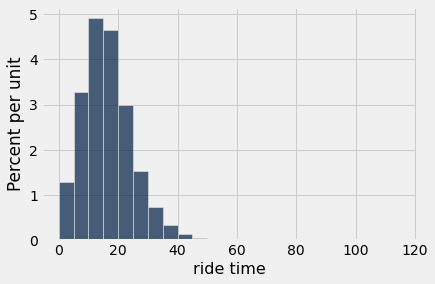

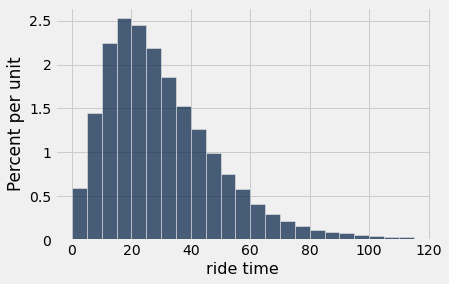

In [13]:
bins = np.arange(0, 120, 5)
boston.hist('ride time', bins=bins)
manila.hist('ride time', bins=bins)

**Question 2.** Set the two variables below to estimates of what percentage of rides are less than 10 minutes in Boston and Manila. Find your estimates by visually assessing the histograms. Your solution should consist of only mathematical operations and numbers.

In [14]:
boston_under_10 = 5 * (1.25 + 3.25)
manila_under_10 = 5 * (0.6 + 1.4)
boston_under_10, manila_under_10

(22.5, 10.0)

**Question 3.** Comment on the main difference between the two histograms. What might be causing this?

**Your Answer Here**: From the looks of it, Manila's ride times tend to be longer, hence the reduction in rides under ten minutes compared to Boston. This longer ride time could be attributed to the terrible traffic that plagues Manila. We can see this in the histogram not only because the ride time's extend much farther out (Manila's max being around 115 minutes, Boston's being around 50 minutes), but also because the peak of the histogram for Manila is greater than that of Boston's. Boston's ride time peak bin is at 10-15 minutes, while the Manila's ride time peak bin is at 15-20 minutes. 

**The following two questions are optional!** 

Please do make an attempt at them, but they will not be incorporated into the final grading of this homework. 

**Optional Question 4.** The `hod` column in each table represents the hour of the day during which the Uber was called. 0 corresponds to 12-1 AM, 1 to 1-2 AM, 13 to 1-2 PM, etc. Write a function which takes in a table like `boston` or `manila`, and an `hod` number between 0 and 23, and displays a histogram of ride lengths from that hour in that city. Use the same bins as before.

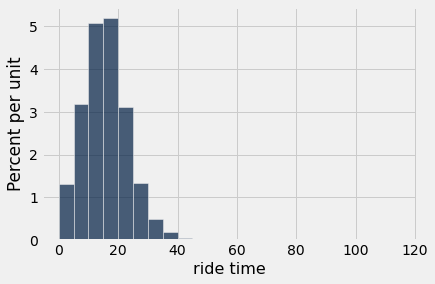

In [15]:
def hist_for_time(tbl, hod):
    bins = np.arange(0, 120, 5)
    tbl.where('hod', are.equal_to(hod)).hist('ride time', bins=bins)

#DO NOT DELETE THIS LINE! 
hist_for_time(boston, 12)

**Optional Question 5.** Which city has a larger difference between Uber ride times at 10 AM vs. 10 PM? In other words, which is larger: the difference between 10 AM and 10 PM Uber ride times in Manila or the difference between 10 AM and 10 PM uber ride times in Boston. Use the function you just created to answer this question. You do not need to calculate an actual difference.

Assign `larger_diff` to the number 1 if the answer is Manila, and 2 if the answer is Boston. 

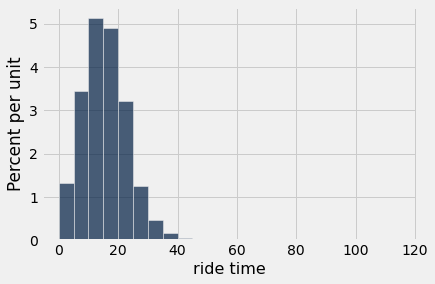

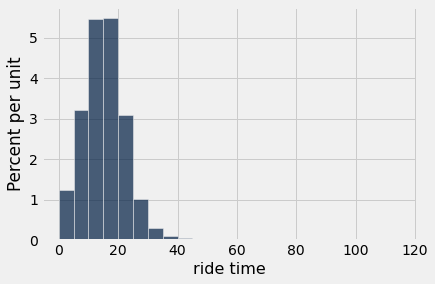

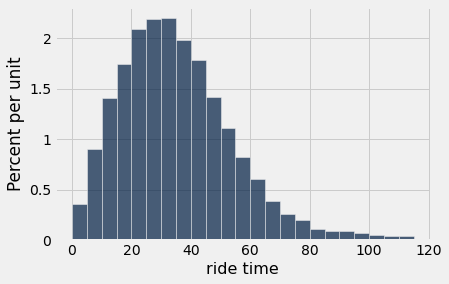

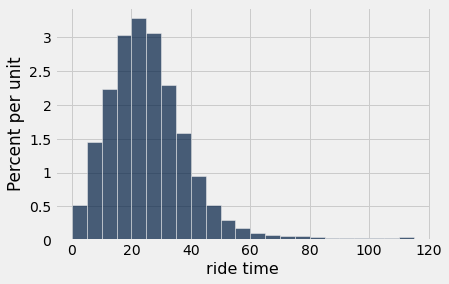

In [16]:
hist_for_time(boston, 10)
hist_for_time(boston, 22)
hist_for_time(manila, 10)
hist_for_time(manila, 22)

In [17]:
larger_diff = 1

In [18]:
check('tests/q2_5.py')

## 3. Faculty salaries


In the next cell, we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/) which contains Berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [19]:
raw_profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015)).drop("year", "title")
profs = raw_profs.relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


In [20]:
profs.where('department', are.equal_to('Computer Science')).sort('gross_salary', descending=True)

name,department,position,gross_salary
MICHAEL JORDAN,Computer Science,professor,366934
RANDY KATZ,Computer Science,professor,296013
DAVID CULLER,Computer Science,professor,265036
UMESH VAZIRANI,Computer Science,professor,245354
STUART RUSSELL,Computer Science,professor,236116
MICHAEL FRANKLIN,Computer Science,professor,232008
RUZENA BAJCSY,Computer Science,professor,223169
DAVID WAGNER,Computer Science,professor,213980
SANJAM GARG,Computer Science,assistant professor,210961
ALEXEI EFROS,Computer Science,associate professor,208948


We want to use this table to generate arrays with the names of each professor in each department.

**Question 1** Set `prof_names` to a table with two columns. The first column should be called "department" and have the name of every department once, and the second column should be called "faculty" and contain an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

In [21]:
# Pick between the two functions defined below 
def identity(array):
    return array 

def first(array):
    return array.item(0)

In [22]:
prof_names = profs.select('name', 'department').group('department', identity).relabel('name identity', 'faculty')
prof_names

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


department,faculty
African American Studies,['AYA DE LEON' 'CHIYUMA ELLIOTT' 'NIKKI JONES' 'DAVID KY ...
Agricultural and Resource Economics and Policy,['MAXIMILIAN AUFFHAMMER' 'CHARLES GIBBONS' 'JEFFREY PERL ...
Anthroplogy,['SABRINA AGARWAL' 'STANLEY BRANDES' 'CHARLES BRIGGS' ' ...
Architecture,['MARK ANDERSON' 'JACOB ATHERTON' 'WILLIAM ATWOOD' 'R.GA ...
Art History,['DILIANA ANGELOVA' 'PATRICIA BERGER' 'JULIA BRYAN-WILSO ...
Art Practice,['ALLAN DESOUZA' 'AIDA GAMEZ' 'RANDY HUSSONG' 'JENNIFER ...
Astronomy,['GIBOR BASRI' 'STEVEN BECKWITH' 'LEO BLITZ' 'EUGENE CHI ...
Bioengineering,['ADAM ARKIN' 'IRINA CONBOY' 'STEVEN CONOLLY' 'JOHN DUEB ...
Biology,['DAVID ACKERLY' 'HILLEL ADESNIK' 'KELLY AGNEW' 'DORIS B ...
Buddhist Studies,['JANN RONIS']


In [23]:
check('tests/q3_1.py')

**Question 2** At the moment, the ```name``` column is sorted by last name. Would the arrays you generated in the previous part be the same if we had sorted by first name instead before generating them? Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. Explain your answer. If you feel you need to make certain assumptions about the data, feel free to state them in your response. 

Although the arrays sorted by last name and first name would have the same number of elements and will even have identical elements, the identical elements will not have the same corresponding index, so therefor the arrays would **not** be the same in that respect. However, they still have the same elements, just in a different order.

**Question 3** Set `biggest_range_dept` to the name of the department with the largest salary range, where range is defined as the **difference between the lowest and highest salaries in the department**. 

*Hint:* First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the salary range of the corresponding department. Then, set `department_ranges` to a table containing the names and salary ranges of each department. 

In [24]:
# Define salary_range in this cell
def salary_range(salaries):
     return max(salaries) - min(salaries)

In [25]:
department_ranges = profs.group('department').with_column(
    'salary range', profs.group('department', identity).apply(salary_range, 'gross_salary identity')
).drop('count')
biggest_range_dept = department_ranges.sort('salary range', descending=True).column('department').item(0)
biggest_range_dept

'Economics'

In [26]:
check('tests/q3_3.py')

## 4. Submission


Congratulations, you're done with Homework 4!  Be sure to 
- **run all the tests and verify that they all pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Hit the Submit button** Your submission will be saved and grade will be posted when it's finished running.

In [27]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import grade_notebook
if not globals().get('__GOFER_GRADER__', False):
    display(grade_notebook('hw04.ipynb', sorted(glob.glob('tests/q*.py'))))

Boston Table
Manila Table
['tests/q1_1.py', 'tests/q1_2.py', 'tests/q1_3.py', 'tests/q1_4.py', 'tests/q2_5.py', 'tests/q3_1.py', 'tests/q3_3.py']
Question 1:


Question 2:


Question 3:


Question 4:


Question 5:


Question 6:


Question 7:


1.0

Name: Rudy Orre  
Section: 0130  
Date: 15 March 2021